In [1325]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [1326]:
# warning 숨기기
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 문제 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

----
# Data Analysis - 04
### - ML 2nd Try

In [1327]:
df = pd.read_csv("../Data/03.통합.csv", index_col='년도')
df

,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액
년도,,,,,,,,,
2013,경기도,12234630,1821303,112129,286,739619,49143,248468.3,13718.5
2013,서울특별시,10143645,1620640,84066,395,469392,48097,462443.1,532689.2
2013,경상남도,3333820,423864,29504,65,190166,12612,57288.6,6703.3
2013,부산광역시,3527635,496161,25831,82,160821,13902,77411.6,59554.5
2013,대구광역시,2501588,363224,19340,86,136309,9981,46578.5,37541.7
...,...,...,...,...,...,...,...,...,...
2020,충청북도,1600837,226441,8607,40,85135,6103,28669.1,27669.5
2020,대전광역시,1463882,243418,7481,44,79807,6405,39341.3,38725.4
2020,강원도,1542840,217897,7835,32,73478,5554,22831.4,23634.2


In [1328]:
# 총인구 컬럼 제거
df.drop(columns='총인구', inplace=True)
df.head()

,시도,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액
년도,,,,,,,,
2013,경기도,1821303,112129,286,739619,49143,248468.3,13718.5
2013,서울특별시,1620640,84066,395,469392,48097,462443.1,532689.2
2013,경상남도,423864,29504,65,190166,12612,57288.6,6703.3
2013,부산광역시,496161,25831,82,160821,13902,77411.6,59554.5
2013,대구광역시,363224,19340,86,136309,9981,46578.5,37541.7


In [1329]:
years = df.index
years

Int64Index([2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', name='년도', length=136)

### k값 찾기

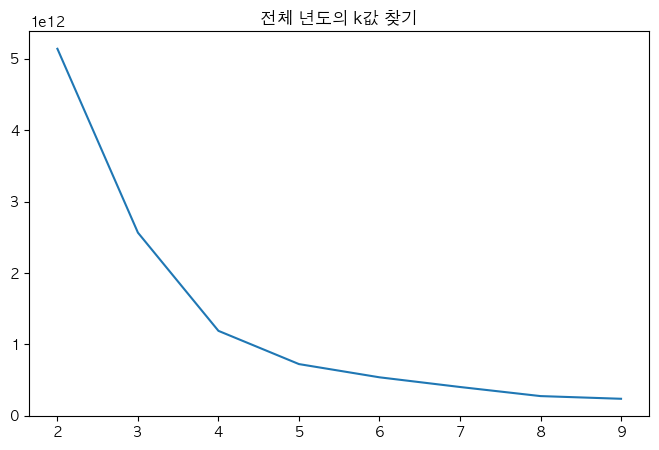

In [1330]:
df_temp = df.copy()
df_temp.set_index('시도', inplace=True)
# df_km = df_temp[df_temp.columns.difference(['총인구'])] # 총인구 컬럼이 존재할 때 사용한 것임
df_km = df_temp
# k값 찾기 --------------------------------------------
scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_km)
    scores.append(km.inertia_)
# 그래프 그리기 ------------------
plt.figure(figsize=(8,5))
plt.plot(range(2,10), scores)
plt.title('전체 년도의 k값 찾기')
plt.show()
# -----------------------------

> #### 후보: 3, 4, 5

----
### k값 적용(k=4) -> 데이터프레임 컬럼 추가

In [1331]:
data_points = df_km.values
km = KMeans(n_clusters=4).fit(data_points) # n_clusters 에 값을 정해주기!

# labels
print(km.labels_)
# 각 군집의 중심위치
km.cluster_centers_

[1 2 0 0 0 0 3 0 3 3 3 3 3 3 3 3 3 1 2 0 0 0 0 3 0 3 3 3 3 3 3 3 3 3 1 2 0
 0 0 0 3 0 3 3 3 3 3 3 3 3 3 1 2 0 0 0 0 3 0 3 3 3 3 3 3 3 3 3 1 2 0 0 0 0
 3 0 3 3 3 3 3 3 3 3 3 1 2 0 0 0 0 3 0 3 3 3 3 3 3 3 3 3 1 2 0 0 0 0 3 0 3
 3 3 3 3 3 3 3 3 1 2 0 0 0 0 3 0 3 3 3 3 3 3 3 3 3]


array([[4.03589850e+05, 2.07180750e+04, 6.76250000e+01, 1.51779725e+05,
        1.13792750e+04, 7.19181200e+04, 4.38354200e+04],
       [1.85165600e+06, 9.83292500e+04, 2.71375000e+02, 7.43822500e+05,
        5.25488750e+04, 3.22522750e+05, 2.05947125e+04],
       [1.61312862e+06, 6.88623750e+04, 3.90250000e+02, 4.37333375e+05,
        4.58475000e+04, 5.71485213e+05, 6.76193713e+05],
       [1.95049262e+05, 1.01237875e+04, 3.37125000e+01, 7.75759125e+04,
        5.29692500e+03, 2.30497900e+04, 3.85136163e+04]])

In [1332]:
# 데이터가 어느 군집에 소속되어 있는지 정하기
df_km['cluster_id'] = km.labels_
df_km

,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster_id
시도,,,,,,,,
경기도,1821303,112129,286,739619,49143,248468.3,13718.5,1
서울특별시,1620640,84066,395,469392,48097,462443.1,532689.2,2
경상남도,423864,29504,65,190166,12612,57288.6,6703.3,0
부산광역시,496161,25831,82,160821,13902,77411.6,59554.5,0
대구광역시,363224,19340,86,136309,9981,46578.5,37541.7,0
...,...,...,...,...,...,...,...,...
충청북도,226441,8607,40,85135,6103,28669.1,27669.5,3
대전광역시,243418,7481,44,79807,6405,39341.3,38725.4,3
강원도,217897,7835,32,73478,5554,22831.4,23634.2,3


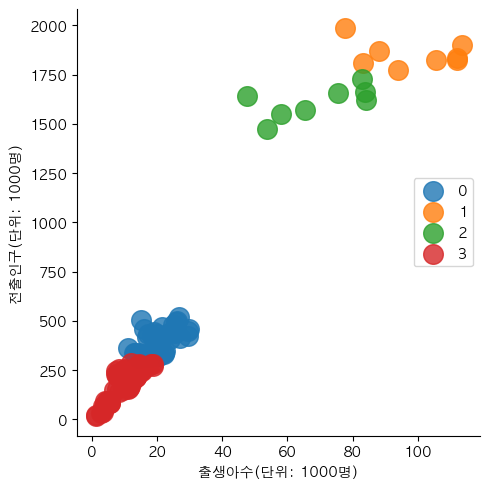

In [1333]:
sns.lmplot(x='출생아수', y='전출인구',
            data=df_km/1000, fit_reg=False,
            scatter_kws={'s':200},
            hue="cluster_id", legend=False
)
plt.xlabel("출생아수(단위: 1000명)")
plt.ylabel("전출인구(단위: 1000명)")
plt.legend(['0','1','2','3'], loc='right', )
plt.show()

----
# Classification

### Feature, Target

In [1334]:
# Feature, Target
data = df_km[['전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생', '예금은행대출금액', '예금액']].to_numpy()
target = df_km['cluster_id'].to_numpy()

----
### 검증 세트 추가
- 훈련(60%), 검증(20%), 테스트(20%)

In [1335]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.2, stratify=target) # random_state=42

In [1336]:
sub_input, val_input, sub_target, val_target = \
    train_test_split(train_input, train_target, test_size=0.2, stratify=train_target) # random_state=42

In [1337]:
# 세트 별 크기
print("Train :", sub_input.shape)
print("Valid :", val_input.shape)
print("Test  :", test_input.shape)

Train : (86, 7)
Valid : (22, 7)
Test  : (28, 7)


----

### 각 ML 별 Score 확인

In [1338]:
# 각 ML별 import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# 교차검증 import
from sklearn.model_selection import cross_validate

ml_list = [KNeighborsClassifier(n_neighbors=3), SVC(), GaussianProcessClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), MLPClassifier(), GaussianNB(), QuadraticDiscriminantAnalysis()]
for ml in ml_list:
    print("- ML :", ml)
    clf = ml
    # 학습
    clf.fit(sub_input, sub_target)
    # 정확도 판단
    print("+ Train score :", clf.score(sub_input, sub_target))
    print("+ Valid score :", clf.score(val_input, val_target))
    # 교차검증
    scores = cross_validate(clf, train_input, train_target)
    # 교차검증 후의 정확도 판단
    print("+ Test score :", np.mean(scores['test_score']))
    print("-"*30)

- ML : KNeighborsClassifier(n_neighbors=3)
+ Train score : 1.0
+ Valid score : 1.0
+ Test score : 1.0
------------------------------
- ML : SVC()
+ Train score : 0.9534883720930233
+ Valid score : 0.8636363636363636
+ Test score : 0.945021645021645
------------------------------
- ML : GaussianProcessClassifier()
+ Train score : 1.0
+ Valid score : 0.5909090909090909
+ Test score : 0.5926406926406926
------------------------------
- ML : DecisionTreeClassifier()
+ Train score : 1.0
+ Valid score : 1.0
+ Test score : 0.9722943722943723
------------------------------
- ML : RandomForestClassifier()
+ Train score : 1.0
+ Valid score : 1.0
+ Test score : 1.0
------------------------------
- ML : AdaBoostClassifier()
+ Train score : 1.0
+ Valid score : 1.0
+ Test score : 0.9904761904761905
------------------------------
- ML : MLPClassifier()
+ Train score : 0.2441860465116279
+ Valid score : 0.2727272727272727
+ Test score : 0.4445887445887446
------------------------------
- ML : Gaussian

----
### 10번의 교차검증 실시

In [1339]:
# 함수: 10번의 교차 검증 실시 => 정확도를 보기 위해서
from sklearn.model_selection import cross_val_score
def cross_validation(classifier, features, labels):
    cv_scores = []
    for i in range(10):
        score = cross_val_score(classifier, features, labels, cv=10, scoring='accuracy')
        cv_scores.append(score.mean())
    return cv_scores

In [1340]:
# 각 Classifier 별 10번의 정확도 확인
ml_list = [KNeighborsClassifier(n_neighbors=3), SVC(), GaussianProcessClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), MLPClassifier(), GaussianNB(), QuadraticDiscriminantAnalysis()]
scores_list = []
for ml in ml_list:
    ml_cv_scores = cross_validation(ml, train_input, train_target)
    scores_list.append(ml_cv_scores)
    print(ml_cv_scores)
ml_cv_scores

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9454545454545455, 0.9454545454545455, 0.9454545454545455, 0.9454545454545455, 0.9454545454545455, 0.9454545454545455, 0.9454545454545455, 0.9454545454545455, 0.9454545454545455, 0.9454545454545455]
[0.5927272727272725, 0.5927272727272725, 0.5927272727272725, 0.5927272727272725, 0.5927272727272725, 0.5927272727272725, 0.5927272727272725, 0.5927272727272725, 0.5927272727272725, 0.5927272727272725]
[0.990909090909091, 0.9727272727272727, 0.9818181818181818, 1.0, 0.990909090909091, 0.9727272727272727, 0.9718181818181819, 0.9818181818181818, 0.9718181818181819, 0.990909090909091]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 0.990909090909091, 0.9818181818181818, 0.990909090909091, 0.990909090909091, 1.0, 1.0, 0.990909090909091, 0.9818181818181818, 0.990909090909091]
[0.3418181818181818, 0.28727272727272724, 0.23363636363636364, 0.2827272727272727, 0.2981818181818182, 0.19272727272727275, 0.31636363636363635, 0.339090909090909

[0.8527272727272728,
 0.8527272727272728,
 0.8527272727272728,
 0.8527272727272728,
 0.8527272727272728,
 0.8527272727272728,
 0.8527272727272728,
 0.8527272727272728,
 0.8527272727272728,
 0.8527272727272728]

### 정확도 시각화

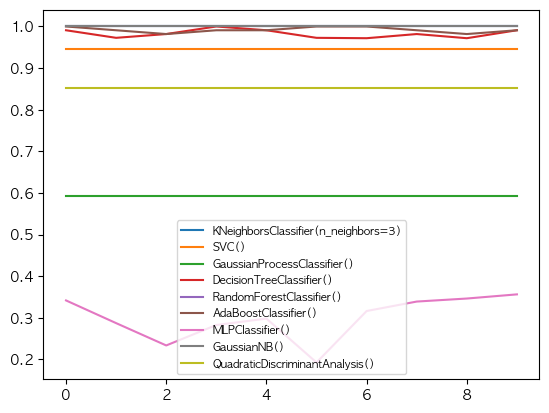

In [1341]:
# 정확도 시각화
cv_list = {}
for ml, scores in zip(ml_list, scores_list):
    cv_list[ml] = scores
cv_list
df = pd.DataFrame(cv_list)
df.plot()
# plt.ylim(0.8,1.1)
plt.legend(fontsize=8)
plt.show()

> ### Classfication 정확도가 높으므로 Regression으로 시도해보자

----
----
# Regression
1. cluster_id : [0, 1, 2, 3] -> [0 ~ 1] 변환
2. Regression 진행

### cluster_id : [0, 1, 2, 3] -> [0 ~ 1] 변환

In [1342]:
df_km['cluster_id'] = df_km['cluster_id'] + 10
df_km_temp = df_km.sort_values(by='전출인구', ascending=True)
temp_list = df_km_temp['cluster_id'].unique()

i = 3
for temp in temp_list:
    df_km['cluster_id'][df_km['cluster_id'] == temp] = i
    i-=1
df_km['cluster_id'] = np.round(df_km['cluster_id'] / 3, 2)
df_km['cluster_id'].unique()

array([0.  , 0.33, 0.67, 1.  ])

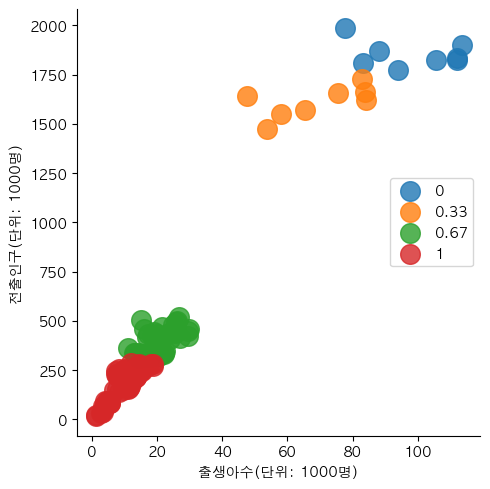

In [1343]:
sns.lmplot(x='출생아수', y='전출인구',
            data=df_km/1000, fit_reg=False,
            scatter_kws={'s':200},
            hue="cluster_id", legend=False
)
plt.xlabel("출생아수(단위: 1000명)")
plt.ylabel("전출인구(단위: 1000명)")
plt.legend(['0','0.33','0.67','1'], loc='right')
plt.show()

In [1344]:
df_km

,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster_id
시도,,,,,,,,
경기도,1821303,112129,286,739619,49143,248468.3,13718.5,0.00
서울특별시,1620640,84066,395,469392,48097,462443.1,532689.2,0.33
경상남도,423864,29504,65,190166,12612,57288.6,6703.3,0.67
부산광역시,496161,25831,82,160821,13902,77411.6,59554.5,0.67
대구광역시,363224,19340,86,136309,9981,46578.5,37541.7,0.67
...,...,...,...,...,...,...,...,...
충청북도,226441,8607,40,85135,6103,28669.1,27669.5,1.00
대전광역시,243418,7481,44,79807,6405,39341.3,38725.4,1.00
강원도,217897,7835,32,73478,5554,22831.4,23634.2,1.00


In [1345]:
# Feature, Target
data = df_km[['전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생', '예금은행대출금액', '예금액']].to_numpy()
target = df_km['cluster_id'].to_numpy()

----
### 검증 세트 추가
- 훈련(60%), 검증(20%), 테스트(20%)

In [1346]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.2) # random_state=42,  stratify=target

In [1347]:
sub_input, val_input, sub_target, val_target = \
    train_test_split(train_input, train_target, test_size=0.2) # random_state=42, stratify=train_target

In [1348]:
# 세트 별 크기
print("Train :", sub_input.shape)
print("Valid :", val_input.shape)
print("Test  :", test_input.shape)

Train : (86, 7)
Valid : (22, 7)
Test  : (28, 7)


----

### 각 ML 별 Score 확인

In [1349]:
# # RandomForest
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor()
# rf.fit(sub_input, sub_target)
# rf.score(test_input, test_target)

In [1350]:
# 각 ML별 import
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# 교차검증 import
from sklearn.model_selection import cross_validate
# 평균 절대값 오차
from sklearn.metrics import mean_absolute_error

# ml_list = [KNeighborsRegressor(n_neighbors=3), SVC(), GaussianProcessRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), MLPRegressor(), GaussianNB(), QuadraticDiscriminantAnalysis()]
# ml_list = [GaussianProcessRegressor(), LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), MLPRegressor()]
ml_list = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor()]
for ml in ml_list:
    print("- ML Name :", ml)
    reg = ml
    # 학습
    reg.fit(sub_input, sub_target)
    # 정확도 판단
    print("+ Train score :", reg.score(sub_input, sub_target))
    print("+ Valid score :", reg.score(val_input, val_target))
    # 교차검증
    scores = cross_validate(reg, train_input, train_target)
    # 교차검증 후의 정확도 판단
    print("+ Test score :", np.mean(scores['test_score']))
    # 평균 절대값 오차
    test_prediction = ml.predict(test_input)
    mae = mean_absolute_error(test_target, test_prediction)
    print("+ Mean Absolute Error :", mae)
    print("-"*40)

- ML Name : LinearRegression()
+ Train score : 0.8712315357264279
+ Valid score : 0.8626037539195961
+ Test score : 0.8113990826247857
+ Mean Absolute Error : 0.08407003074124646
----------------------------------------
- ML Name : DecisionTreeRegressor()
+ Train score : 1.0
+ Valid score : 1.0
+ Test score : 0.9880495615479006
+ Mean Absolute Error : 2.7755575615628914e-17
----------------------------------------
- ML Name : RandomForestRegressor()
+ Train score : 0.9994087280440087
+ Valid score : 0.999383360816647
+ Test score : 0.9951669640086399
+ Mean Absolute Error : 0.005657142857143166
----------------------------------------
- ML Name : AdaBoostRegressor()
+ Train score : 1.0
+ Valid score : 1.0
+ Test score : 1.0
+ Mean Absolute Error : 0.0
----------------------------------------


----
### 10번의 교차검증 실시

In [1351]:
# 함수: 10번의 교차 검증 실시 => 정확도를 보기 위해서
from sklearn.model_selection import cross_validate
def cross_validation(regressor, features, labels):
    cv_scores = []
    for i in range(10):
        # score = cross_val_score(regressor, features, labels, cv=10, scoring='accuracy')
        score = cross_val_score(regressor, features, labels, cv=10)
        cv_scores.append(score.mean())
    return cv_scores

In [1352]:
# 각 Regressor 별 10번의 정확도 확인
ml_list = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor()]
scores_list = []
for ml in ml_list:
    ml_cv_scores = cross_validation(ml, train_input, train_target)
    scores_list.append(ml_cv_scores)
    print("-",ml,':', ml_cv_scores)
    print("-------------")

- LinearRegression() : [0.7384765339984218, 0.7384765339984218, 0.7384765339984218, 0.7384765339984218, 0.7384765339984218, 0.7384765339984218, 0.7384765339984218, 0.7384765339984218, 0.7384765339984218, 0.7384765339984218]
-------------
- DecisionTreeRegressor() : [0.9607142857142857, 0.9505534632805741, 0.9898391775662884, 0.954158209618049, 1.0, 0.9796783551325767, 0.9439973871843372, 0.9796783551325767, 1.0, 0.954158209618049]
-------------
- RandomForestRegressor() : [0.9951165403695901, 0.995806396214993, 0.9969550346400101, 0.9941190783107297, 0.9947573275575499, 0.9953492299618073, 0.9964258547872046, 0.9958863926904193, 0.9956239398897972, 0.9957851994352789]
-------------
- AdaBoostRegressor() : [0.9583333333333334, 0.9898391775662884, 0.9607142857142857, 0.9832831014700515, 0.9796783551325767, 0.9403926408468625, 0.9553055742108798, 1.0, 0.9436223703829029, 0.9731222790363401]
-------------


### 정확도 시각화

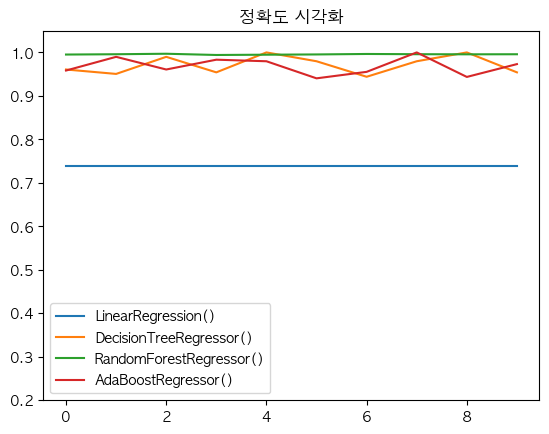

In [1353]:
# 정확도 시각화
cv_list = {}
for ml, scores in zip(ml_list, scores_list):
    cv_list[ml] = scores
cv_list
df_temp = pd.DataFrame(cv_list)
df_temp.plot()
plt.title('정확도 시각화')
plt.ylim(0.2,1.05)
plt.show()

In [1354]:
df

,KNeighborsClassifier(n_neighbors=3),SVC(),GaussianProcessClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),MLPClassifier(),GaussianNB(),QuadraticDiscriminantAnalysis()
0,1.0,0.945455,0.592727,0.990909,1.0,1.000000,0.341818,1.0,0.852727
1,1.0,0.945455,0.592727,0.972727,1.0,0.990909,0.287273,1.0,0.852727
2,1.0,0.945455,0.592727,0.981818,1.0,0.981818,0.233636,1.0,0.852727
3,1.0,0.945455,0.592727,1.000000,1.0,0.990909,0.282727,1.0,0.852727
4,1.0,0.945455,0.592727,0.990909,1.0,0.990909,0.298182,1.0,0.852727
5,1.0,0.945455,0.592727,0.972727,1.0,1.000000,0.192727,1.0,0.852727
6,1.0,0.945455,0.592727,0.971818,1.0,1.000000,0.316364,1.0,0.852727
7,1.0,0.945455,0.592727,0.981818,1.0,0.990909,0.339091,1.0,0.852727
8,1.0,0.945455,0.592727,0.971818,1.0,0.981818,0.346364,1.0,0.852727
9,1.0,0.945455,0.592727,0.990909,1.0,0.990909,0.356364,1.0,0.852727


----
## 검증세트 대신 K-Fold로 확인하기

----
### 컬럼선택하여 돌려보기

In [1355]:
# df_km.head()

In [1356]:
# # Feature, Target -- '전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생', '예금은행대출금액', '예금액'
# data = df_km[['전출인구']].to_numpy()
# target = df_km['cluster_id'].to_numpy()

# train_input, test_input, train_target, test_target = \
#     train_test_split(data, target, test_size=0.2) # random_state=42,  stratify=target
# sub_input, val_input, sub_target, val_target = \
#     train_test_split(train_input, train_target, test_size=0.2, stratify=train_target) # random_state=42

# # 세트 별 크기
# print("Train :", sub_input.shape)
# print("Valid :", val_input.shape)
# print("Test  :", test_input.shape)

In [1357]:
# np.min(sub_input), np.max(sub_input)

In [1358]:
# # RandomForest
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor()
# rf.fit(sub_input, sub_target)
# rf.score(test_input, test_target)

In [1359]:
# rf.predict([[484199]])

----
## 표준화 작업

In [1360]:
df_km.head()

,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster_id
시도,,,,,,,,
경기도,1821303,112129,286,739619,49143,248468.3,13718.5,0.00
서울특별시,1620640,84066,395,469392,48097,462443.1,532689.2,0.33
경상남도,423864,29504,65,190166,12612,57288.6,6703.3,0.67
부산광역시,496161,25831,82,160821,13902,77411.6,59554.5,0.67
대구광역시,363224,19340,86,136309,9981,46578.5,37541.7,0.67


In [1361]:
# 최대값과 최소값 가져오기
min_max_scaler = preprocessing.MinMaxScaler()

col = df_km.columns[:6]
x = df_km[col].values
x_scaled = min_max_scaler.fit_transform(x.astype(float))
x_scaled

array([[0.91727346, 0.98784524, 0.72264631, 0.96049978, 0.77675027,
        0.33995758],
       [0.815367  , 0.73813888, 1.        , 0.60617528, 0.76007271,
        0.6356111 ],
       [0.20758574, 0.25264272, 0.16030534, 0.24005119, 0.19429519,
        0.07580053],
       [0.24430168, 0.21996014, 0.20356234, 0.20157371, 0.21486312,
        0.10360491],
       [0.17678979, 0.1622028 , 0.21374046, 0.16943332, 0.15234618,
        0.06100216],
       [0.21556607, 0.21754876, 0.17048346, 0.19776727, 0.17691609,
        0.08283308],
       [0.1245682 , 0.11962557, 0.12722646, 0.12855764, 0.10378035,
        0.02786724],
       [0.16041623, 0.18770466, 0.13994911, 0.1680277 , 0.13872989,
        0.03595681],
       [0.10877055, 0.10337771, 0.10941476, 0.11665185, 0.09432548,
        0.02853766],
       [0.12845731, 0.15586738, 0.11450382, 0.14308717, 0.11537174,
        0.03318383],
       [0.1175802 , 0.12715333, 0.05597964, 0.12078347, 0.0945487 ,
        0.01870726],
       [0.07215313, 0

In [1362]:
# 정규화된 데이터프레임 생성
df_km_norm = pd.DataFrame(x_scaled, columns=col, index=df_km.index)
# df_2020_norm['시도'] = df['시도']
df_km_norm.head()

,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액
시도,,,,,,
경기도,0.917273,0.987845,0.722646,0.960500,0.776750,0.339958
서울특별시,0.815367,0.738139,1.000000,0.606175,0.760073,0.635611
경상남도,0.207586,0.252643,0.160305,0.240051,0.194295,0.075801
부산광역시,0.244302,0.219960,0.203562,0.201574,0.214863,0.103605
대구광역시,0.176790,0.162203,0.213740,0.169433,0.152346,0.061002


In [1363]:
df_km_norm['cluster_id'] = df_km['cluster_id']
df_km_norm.head()

,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,cluster_id
시도,,,,,,,
경기도,0.917273,0.987845,0.722646,0.960500,0.776750,0.339958,0.00
서울특별시,0.815367,0.738139,1.000000,0.606175,0.760073,0.635611,0.33
경상남도,0.207586,0.252643,0.160305,0.240051,0.194295,0.075801,0.67
부산광역시,0.244302,0.219960,0.203562,0.201574,0.214863,0.103605,0.67
대구광역시,0.176790,0.162203,0.213740,0.169433,0.152346,0.061002,0.67


In [1364]:
df_feature = df_km_norm.iloc[:,:6]
df_feature.head()

,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액
시도,,,,,,
경기도,0.917273,0.987845,0.722646,0.960500,0.776750,0.339958
서울특별시,0.815367,0.738139,1.000000,0.606175,0.760073,0.635611
경상남도,0.207586,0.252643,0.160305,0.240051,0.194295,0.075801
부산광역시,0.244302,0.219960,0.203562,0.201574,0.214863,0.103605
대구광역시,0.176790,0.162203,0.213740,0.169433,0.152346,0.061002


---
## 주성분 분석

In [1365]:
df_feature.shape

(136, 6)

In [1366]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6) # 136개의 데이터중 구별이 확실한 주성분 6개를 선택
pca.fit(df_feature)

PCA(n_components=6)

In [1367]:
pca.components_.shape # sample 6개만 들어가있다

(6, 6)

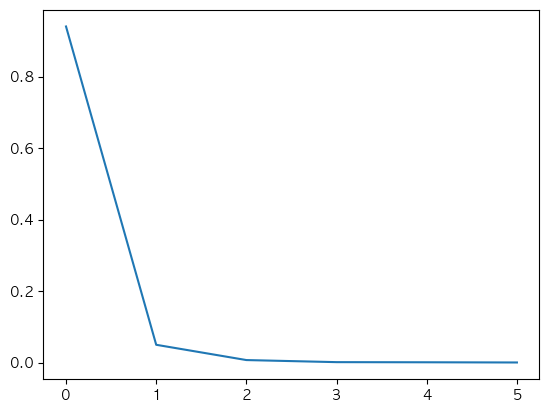

In [1368]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

> ### 2개 or 1개 선정

In [1369]:
print(pca.explained_variance_ratio_)
print('sum:', sum(pca.explained_variance_ratio_))

[9.40433673e-01 4.98711707e-02 7.11612195e-03 1.29605087e-03
 9.21006172e-04 3.61977134e-04]
sum: 1.0


In [1370]:
pca = PCA(n_components=1)
pca.fit(df_feature)

PCA(n_components=1)

In [1371]:
pca.components_.shape # sample 50개만 들어가있다 # 50개가 뭔지 그래프로 그려보자

(1, 6)

In [1372]:
pca

PCA(n_components=1)

In [1373]:
# 행의 갯수는 원본과 동일하게 하고 Feature의 특성을 50개의 주성분으로 변경하기
print(df_feature.shape)
km_pca = pca.transform(df_feature)
print(km_pca.shape)
km_pca

(136, 6)
(136, 1)


array([[ 1.48929268e+00],
       [ 1.41840047e+00],
       [ 1.22838632e-02],
       [ 3.79842198e-02],
       [-6.40864438e-02],
       [-1.49118648e-02],
       [-1.90249060e-01],
       [-1.08780762e-01],
       [-2.20095209e-01],
       [-1.67589160e-01],
       [-2.31859303e-01],
       [-2.91631145e-01],
       [-2.23801199e-01],
       [-2.05655751e-01],
       [-2.59616715e-01],
       [-3.69245899e-01],
       [-4.53613100e-01],
       [ 1.50450005e+00],
       [ 1.44603705e+00],
       [ 2.13662903e-02],
       [ 3.96839028e-02],
       [-5.88123286e-02],
       [-1.15948164e-02],
       [-1.82030472e-01],
       [-1.06485167e-01],
       [-2.16248952e-01],
       [-1.64410694e-01],
       [-2.30020350e-01],
       [-2.84570491e-01],
       [-2.24912305e-01],
       [-2.01957471e-01],
       [-2.60790142e-01],
       [-3.69643919e-01],
       [-4.47312013e-01],
       [ 1.51192823e+00],
       [ 1.42938739e+00],
       [ 1.81523454e-02],
       [ 3.59236253e-02],
       [-6.3

In [1374]:
km_pca.tolist()

[[1.4892926835210945],
 [1.4184004677104518],
 [0.01228386317131125],
 [0.03798421982061717],
 [-0.06408644378606558],
 [-0.014911864806538142],
 [-0.19024905952236515],
 [-0.10878076220310948],
 [-0.2200952085706743],
 [-0.16758915994858084],
 [-0.23185930341105107],
 [-0.29163114536931606],
 [-0.22380119877290278],
 [-0.20565575132803965],
 [-0.25961671519840324],
 [-0.36924589872825114],
 [-0.4536131002892565],
 [1.504500052030814],
 [1.4460370507396234],
 [0.021366290270933962],
 [0.03968390279926456],
 [-0.058812328568865854],
 [-0.011594816366430054],
 [-0.18203047220228902],
 [-0.10648516674812762],
 [-0.2162489515704781],
 [-0.16441069432505928],
 [-0.23002035042697477],
 [-0.2845704913227914],
 [-0.2249123050088558],
 [-0.20195747145045156],
 [-0.2607901424200175],
 [-0.36964391938743196],
 [-0.44731201268373055],
 [1.5119282311985507],
 [1.4293873929510525],
 [0.018152345362887668],
 [0.03592362530396801],
 [-0.06319241400098984],
 [-0.012143306745886321],
 [-0.18897587279543

In [1375]:
df_km_pca = pd.DataFrame(km_pca.tolist(), columns=['principal_col'], index=df_km.index)
# df_km_pca['cluster_id'] = df_km['cluster_id'].to_list()
df_km_pca

,principal_col
시도,
경기도,1.489293
서울특별시,1.418400
경상남도,0.012284
부산광역시,0.037984
대구광역시,-0.064086
...,...
충청북도,-0.245285
대전광역시,-0.236565
강원도,-0.271343


In [1376]:
df_km_pca['cluster_id'] = df_km['cluster_id']
df_km_pca

,principal_col,cluster_id
시도,,
경기도,1.489293,0.00
서울특별시,1.418400,0.33
경상남도,0.012284,0.67
부산광역시,0.037984,0.67
대구광역시,-0.064086,0.67
...,...,...
충청북도,-0.245285,1.00
대전광역시,-0.236565,1.00
강원도,-0.271343,1.00


In [1377]:
# df_km_pca = pd.DataFrame({'년도':years, 'principal_col':km_pca.tolist()})
df_km_pca['년도'] = years
df_km_pca

,principal_col,cluster_id,년도
시도,,,
경기도,1.489293,0.00,2013
서울특별시,1.418400,0.33,2013
경상남도,0.012284,0.67,2013
부산광역시,0.037984,0.67,2013
대구광역시,-0.064086,0.67,2013
...,...,...,...
충청북도,-0.245285,1.00,2020
대전광역시,-0.236565,1.00,2020
강원도,-0.271343,1.00,2020


In [1378]:
df_km_pca['시도'] = df_km_pca.index
df_km_pca.set_index('년도', inplace=True)
df_km_pca = df_km_pca.iloc[:,[2, 0, 1]]
df_km_pca

,시도,principal_col,cluster_id
년도,,,
2013,경기도,1.489293,0.00
2013,서울특별시,1.418400,0.33
2013,경상남도,0.012284,0.67
2013,부산광역시,0.037984,0.67
2013,대구광역시,-0.064086,0.67
...,...,...,...
2020,충청북도,-0.245285,1.00
2020,대전광역시,-0.236565,1.00
2020,강원도,-0.271343,1.00


In [1379]:
print('최소값:', round(np.min(df_km_pca['principal_col']), 2), '최대값:', round(np.max(df_km_pca['principal_col']), 2))

최소값: -0.45 최대값: 1.57


In [1380]:
df_km_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 2013 to 2020
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   시도             136 non-null    object 
 1   principal_col  136 non-null    float64
 2   cluster_id     136 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.2+ KB


In [1381]:
# Feature, Target
data = df_km_pca[['principal_col']].to_numpy()
target = df_km_pca['cluster_id'].to_numpy()

----
### 검증 세트 추가
- 훈련(60%), 검증(20%), 테스트(20%)

In [1382]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.2) # random_state=42,  stratify=target
sub_input, val_input, sub_target, val_target = \
    train_test_split(train_input, train_target, test_size=0.2, stratify=train_target) # random_state=42
# 세트 별 크기
print("Train :", sub_input.shape)
print("Valid :", val_input.shape)
print("Test  :", test_input.shape)

Train : (86, 1)
Valid : (22, 1)
Test  : (28, 1)


In [1383]:
ml_list = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]
for ml in ml_list:
    print("- ML Name :", ml)
    reg = ml
    # 학습
    reg.fit(sub_input, sub_target)
    # 정확도 판단
    print("+ Train score :", reg.score(sub_input, sub_target))
    print("+ Valid score :", reg.score(val_input, val_target))
    # 교차검증
    scores = cross_validate(reg, train_input, train_target)
    # 교차검증 후의 정확도 판단
    print("+ Test score :", np.mean(scores['test_score']))
    # 평균 절대값 오차
    test_prediction = ml.predict(test_input)
    mae = mean_absolute_error(test_target, test_prediction)
    print("+ Mean Absolute Error :", mae)
    print("-"*40)

- ML Name : LinearRegression()
+ Train score : 0.8437145788442338
+ Valid score : 0.7975836933006013
+ Test score : 0.7559015062994268
+ Mean Absolute Error : 0.10191171442697693
----------------------------------------
- ML Name : DecisionTreeRegressor()
+ Train score : 1.0
+ Valid score : 1.0
+ Test score : 0.9876338998448088
+ Mean Absolute Error : 0.011785714285714318
----------------------------------------
- ML Name : RandomForestRegressor()
+ Train score : 0.998517738902212
+ Valid score : 0.9999707882704383
+ Test score : 0.9851948229186929
+ Mean Absolute Error : 0.011667857142857552
----------------------------------------


In [1384]:
# 각 Regressor 별 10번의 정확도 확인
ml_list = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor()]
scores_list = []
for ml in ml_list:
    ml_cv_scores = cross_validation(ml, train_input, train_target)
    scores_list.append(ml_cv_scores)
    print("-",ml,':', ml_cv_scores)
    print("-------------")

- LinearRegression() : [0.664231272919907, 0.664231272919907, 0.664231272919907, 0.664231272919907, 0.664231272919907, 0.664231272919907, 0.664231272919907, 0.664231272919907, 0.664231272919907, 0.664231272919907]
-------------
- DecisionTreeRegressor() : [0.9859193173002326, 0.9859193173002326, 0.9859193173002326, 0.9859193173002326, 0.9859193173002326, 0.9859193173002326, 0.9859193173002326, 0.9859193173002326, 0.9859193173002326, 0.9859193173002326]
-------------
- RandomForestRegressor() : [0.9846271518569925, 0.9870717412617527, 0.9849936075699783, 0.9837093376434811, 0.983516073633807, 0.9822267603935891, 0.9848356610011895, 0.9843767500416053, 0.9851417318159568, 0.9828642217492499]
-------------
- AdaBoostRegressor() : [0.9718386346004655, 0.9859193173002326, 0.9793536109071782, 0.9577579519006981, 0.9577579519006981, 0.940067896621464, 0.9859193173002326, 0.9718386346004655, 0.9718386346004655, 0.9859193173002326]
-------------


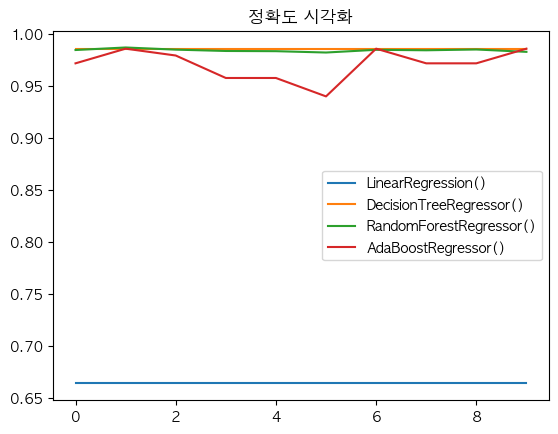

In [1385]:
# 정확도 시각화
cv_list = {}
for ml, scores in zip(ml_list, scores_list):
    cv_list[ml] = scores
cv_list
df = pd.DataFrame(cv_list)
df.plot()
plt.title('정확도 시각화')
plt.show()

### 산점도 그려보기

In [1386]:
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [1387]:
print(lr.coef_, lr.intercept_)

[-0.49026133] 0.8033542965094167


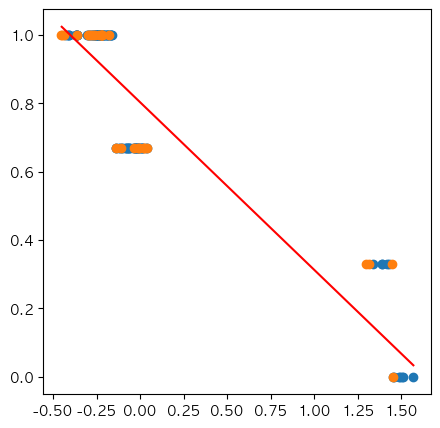

In [1388]:
# 구간별 직선을 그리기 위해 15에서 49까지의 정수 배열을 만든다.
# point = np.arange(-0.5, 2)

# 훈련세트의 산점도
plt.figure(figsize=(5,5))
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)

# 15에서 50까지 1차 방정식 그래프
# plt.plot(point, -4.66*point + 0.80, c='red')
plt.plot([-0.45, 1.57], [(-0.45)*lr.coef_+lr.intercept_, (1.57)*lr.coef_+lr.intercept_], c='red')

# 50cm 생선최소값: -0.45 최대값: -0.45
# plt.scatter(50, 1241.8, marker='^')

plt.show()

In [1394]:
ml_list = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), GaussianProcessRegressor(), MLPRegressor()]
for ml in ml_list:
    ml_cv_scores = cross_validation(ml, train_input, train_target)
    print(ml, ':', ml_cv_scores)
ml_cv_scores

LinearRegression() : [0.664231272919907, 0.664231272919907, 0.664231272919907, 0.664231272919907, 0.664231272919907, 0.664231272919907, 0.664231272919907, 0.664231272919907, 0.664231272919907, 0.664231272919907]
DecisionTreeRegressor() : [0.9859193173002326, 0.9859193173002326, 0.9859193173002326, 0.9859193173002326, 0.9859193173002326, 0.9859193173002326, 0.9859193173002326, 0.9859193173002326, 0.9859193173002326, 0.9859193173002326]
RandomForestRegressor() : [0.9853691678120582, 0.9835033024729075, 0.9854153541130456, 0.9849320059493761, 0.9838220942766561, 0.9847806096206158, 0.9842615107893167, 0.9840375423197096, 0.9854383687715172, 0.9854835623147503]
AdaBoostRegressor() : [0.9577579519006981, 0.9325529203147512, 0.9718386346004655, 0.9577579519006981, 0.9718386346004655, 0.9793536109071782, 0.9718386346004655, 0.9652729282074111, 0.9859193173002326, 0.9466336030145184]
GaussianProcessRegressor() : [0.910474668203627, 0.910474668203627, 0.910474668203627, 0.910474668203627, 0.910

[0.7048541073229215,
 0.7272424766763758,
 0.6916277353478413,
 0.7031869775785629,
 0.690091544283408,
 0.6889555132657401,
 0.7001842545897362,
 0.6838729473981604,
 0.7246561154888316,
 0.7004092028925205]

In [1390]:
df_km_pca

,시도,principal_col,cluster_id
년도,,,
2013,경기도,1.489293,0.00
2013,서울특별시,1.418400,0.33
2013,경상남도,0.012284,0.67
2013,부산광역시,0.037984,0.67
2013,대구광역시,-0.064086,0.67
...,...,...,...
2020,충청북도,-0.245285,1.00
2020,대전광역시,-0.236565,1.00
2020,강원도,-0.271343,1.00


<AxesSubplot: xlabel='년도', ylabel='principal_col'>

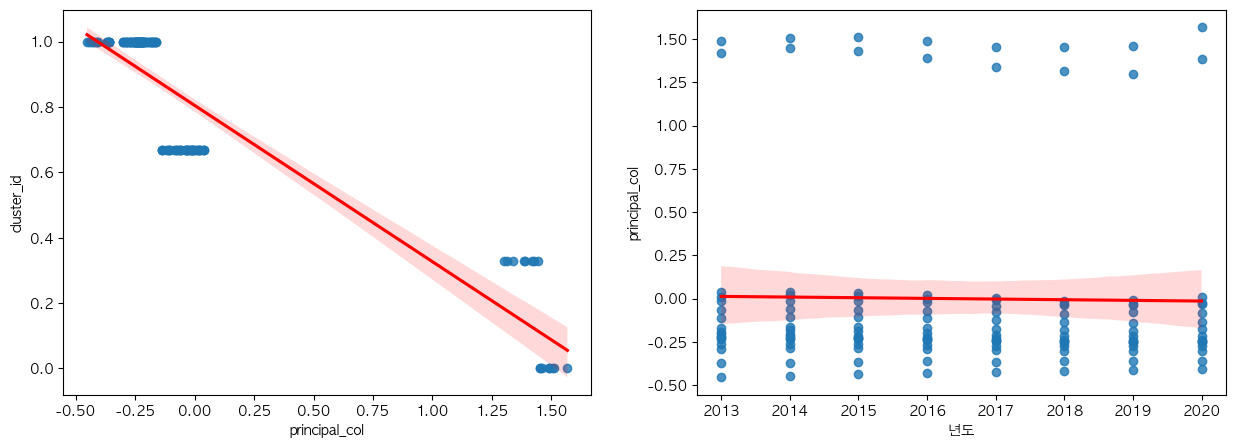

In [1405]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 선형회귀선 표시 cf.regression
sns.regplot(
    x = 'principal_col',
    y = 'cluster_id',
    data=df_km_pca,
    # scatter_kws={'color' : 'black'}, # scatter color
    line_kws={'color' : 'red'}, # regression line color # 희미한 범위색은 표준오차(stdl)이다.
    ax=ax1,
    fit_reg=True
)

sns.regplot(
    x = df_km_pca.index,
    y = 'principal_col',
    data=df_km_pca,
    # scatter_kws={'color' : 'black'}, # scatter color
    line_kws={'color' : 'red'}, # regression line color # 희미한 범위색은 표준오차(stdl)이다.
    ax=ax2,
    fit_reg=True
)

In [1419]:
sido_list = df_km_pca['시도'].unique()
sido_list

array(['경기도', '서울특별시', '경상남도', '부산광역시', '대구광역시', '인천광역시', '전라북도', '경상북도',
       '광주광역시', '충청남도', '전라남도', '울산광역시', '충청북도', '대전광역시', '강원도',
       '제주특별자치도', '세종특별자치시'], dtype=object)

In [1420]:
for sido in sido_list:
    df_km_pca_temp = df_km_pca[df_km_pca['시도'] == sido]

In [1421]:
df_km_pca_temp

,시도,principal_col,cluster_id
년도,,,
2013,세종특별자치시,-0.453613,1.0
2014,세종특별자치시,-0.447312,1.0
2015,세종특별자치시,-0.435691,1.0
2016,세종특별자치시,-0.428720,1.0
2017,세종특별자치시,-0.422290,1.0
2018,세종특별자치시,-0.415248,1.0
2019,세종특별자치시,-0.410295,1.0
2020,세종특별자치시,-0.406634,1.0


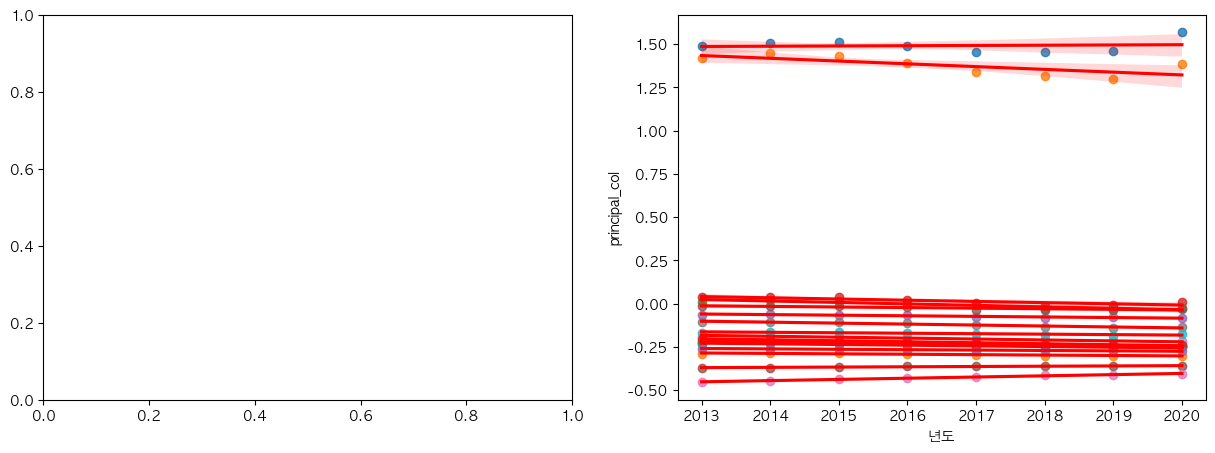

In [1426]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

for sido in sido_list:
    df_km_pca_temp = df_km_pca[df_km_pca['시도'] == sido]
    sns.regplot(
        x = df_km_pca_temp.index,
        y = 'principal_col',
        data=df_km_pca_temp,
        # scatter_kws={'color' : 'black'}, # scatter color
        line_kws={'color' : 'red'}, # regression line color # 희미한 범위색은 표준오차(stdl)이다.
        ax=ax2,
        fit_reg=True
    )

----
----
----
----
----
----

----
### Decision Model

In [ ]:
# 모델 tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()  # random_state=42
dt.fit(sub_input, sub_target)

print("Train score :", dt.score(sub_input, sub_target))
print("Valid score :", dt.score(val_input, val_target))

ValueError: Unknown label type: 'continuous'

In [ ]:
# 교차 검증
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
scores

{'fit_time': array([0.00073981, 0.00046682, 0.00039816, 0.00031996, 0.00032496]),
 'score_time': array([0.00040483, 0.0002811 , 0.00019503, 0.00017881, 0.00017095]),
 'test_score': array([1., 1., 1., 1., 1.])}

In [ ]:
# 교차검증 후의 정확도 판단
import numpy as np
np.mean(scores['test_score'])

1.0

In [ ]:
dt.predict(train_input)

array([0, 1, 1, 1, 3, 3, 3, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 0, 1, 1, 2, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3,
       0, 2, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 0, 1,
       3, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 3, 3, 1, 3, 3, 1, 3, 1, 1, 1, 1,
       3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 1, 0, 1, 2],
      dtype=int32)

----
### Random Forest

In [ ]:
# RandomForest
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1) # default:100 # random_state=42
rf.fit(sub_input, sub_target)

print("Train score :", rf.score(sub_input, sub_target))
print("Valid score :", rf.score(val_input, val_target))

Train score : 1.0
Valid score : 1.0


In [ ]:
# 교차 검증
from sklearn.model_selection import cross_validate
scores = cross_validate(rf, train_input, train_target)
scores

{'fit_time': array([0.04317784, 0.03798604, 0.03801394, 0.0378592 , 0.04014325]),
 'score_time': array([0.00655007, 0.00646925, 0.00697088, 0.00694203, 0.00744295]),
 'test_score': array([1., 1., 1., 1., 1.])}

In [ ]:
# 교차검증 후의 정확도 판단
import numpy as np
np.mean(scores['test_score'])

1.0

In [ ]:
rf.predict(test_input)

array([1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 0, 1, 1, 0, 1, 3, 1, 1, 1,
       1, 2, 3, 1, 3, 3], dtype=int32)

> ## Classfication 정확도가 높으므로 Regression으로 시도해보자

In [ ]:
# # KNN
# from sklearn.neighbors import KNeighborsClassifier
# clf = KNeighborsClassifier(n_neighbors=3)
# clf.fit(train_input, train_target)
# clf.score(test_input, test_target)

----
----
# Regression
1. cluster_id : [0, 1, 2, 3] -> [0 ~ 1] 변환
2. Regression 진행

### cluster_id : [0, 1, 2, 3] -> [0 ~ 1] 변환

In [ ]:
df_km['cluster_id'] = df_km['cluster_id'] + 10
df_km_temp = df_km.sort_values(by='전출인구', ascending=True)
temp_list = df_km_temp['cluster_id'].unique()

i = 3
for temp in temp_list:
    df_km['cluster_id'][df_km['cluster_id'] == temp] = i
    i-=1
df_km['cluster_id'] = np.round(df_km['cluster_id'] / 3, 2)
df_km['cluster_id'].unique()

array([0.  , 0.33, 0.67, 1.  ])

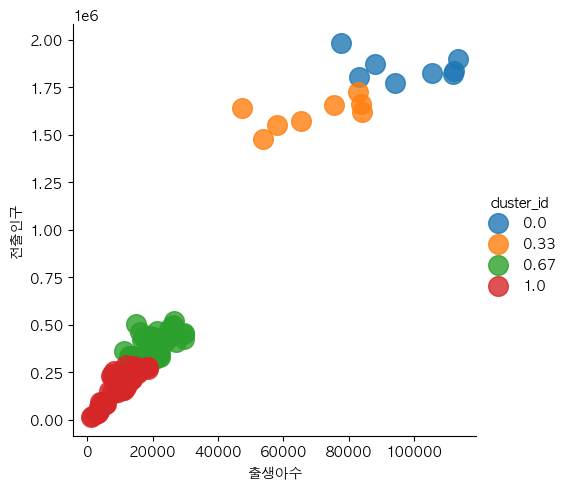

In [ ]:
sns.lmplot(x='출생아수', y='전출인구',
            data=df_km, fit_reg=False,
            scatter_kws={'s':200},
            hue="cluster_id"
)
plt.show()

In [ ]:
# Feature, Target
data = df_km[['전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생', '예금은행대출금액', '예금액']].to_numpy()
target = df_km['cluster_id'].to_numpy()

----
### 검증 세트 추가
- 훈련(60%), 검증(20%), 테스트(20%)

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.2) # random_state=42,  stratify=target

In [ ]:
sub_input, val_input, sub_target, val_target = \
    train_test_split(train_input, train_target, test_size=0.2, stratify=train_target) # random_state=42

In [ ]:
# 세트 별 크기
print("Train :", sub_input.shape)
print("Valid :", val_input.shape)
print("Test  :", test_input.shape)

Train : (86, 7)
Valid : (22, 7)
Test  : (28, 7)


----
### Decision Model

In [ ]:
# 모델 tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()  # random_state=42
dt.fit(sub_input, sub_target)

print("Train score :", dt.score(sub_input, sub_target))
print("Valid score :", dt.score(val_input, val_target))

Train score : 1.0
Valid score : 1.0


In [ ]:
# 교차 검증
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
scores

{'fit_time': array([0.00137115, 0.00087714, 0.00036788, 0.00030088, 0.00050712]),
 'score_time': array([0.00027394, 0.00030494, 0.00016189, 0.00016284, 0.00018001]),
 'test_score': array([0.94774244, 0.95286688, 1.        , 1.        , 1.        ])}

In [ ]:
# 교차검증 후의 정확도 판단
import numpy as np
np.mean(scores['test_score'])

0.9801218646387161

In [ ]:
dt.predict(train_input)

array([1.  , 1.  , 1.  , 1.  , 1.  , 0.67, 0.67, 1.  , 0.67, 1.  , 0.67,
       1.  , 0.67, 0.67, 1.  , 0.67, 1.  , 0.33, 0.  , 0.  , 1.  , 1.  ,
       1.  , 1.  , 0.  , 1.  , 0.67, 1.  , 0.  , 1.  , 1.  , 1.  , 0.33,
       1.  , 0.67, 1.  , 1.  , 0.67, 0.67, 1.  , 0.33, 1.  , 1.  , 0.67,
       1.  , 1.  , 0.67, 0.67, 0.67, 0.67, 1.  , 0.33, 1.  , 1.  , 0.67,
       1.  , 0.33, 0.67, 1.  , 1.  , 0.67, 1.  , 1.  , 1.  , 1.  , 0.67,
       1.  , 1.  , 1.  , 0.67, 0.67, 1.  , 1.  , 1.  , 0.67, 0.  , 1.  ,
       0.67, 1.  , 1.  , 1.  , 0.67, 1.  , 0.67, 0.67, 0.67, 1.  , 0.67,
       1.  , 0.33, 0.67, 1.  , 1.  , 1.  , 0.67, 0.67, 0.67, 1.  , 0.67,
       0.67, 1.  , 1.  , 0.67, 1.  , 1.  , 1.  , 0.  , 0.67])

----
### Random Forest

In [ ]:
# RandomForest
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1) # default:100 # random_state=42
rf.fit(sub_input, sub_target)

print("Train score :", rf.score(sub_input, sub_target))
print("Valid score :", rf.score(val_input, val_target))

Train score : 0.9990279478260747
Valid score : 0.9982068083323835


In [ ]:
# 교차 검증
from sklearn.model_selection import cross_validate
scores = cross_validate(rf, train_input, train_target)
scores

{'fit_time': array([0.04407716, 0.03859782, 0.03933501, 0.03601933, 0.03644705]),
 'score_time': array([0.00625896, 0.00579906, 0.00585699, 0.00518894, 0.00509214]),
 'test_score': array([0.99352798, 0.99119082, 0.99060723, 0.99356399, 0.99740895])}

In [ ]:
# 교차검증 후의 정확도 판단
import numpy as np
np.mean(scores['test_score'])

0.9932597929507022

In [ ]:
rf.predict(test_input)

array([0.0066, 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 0.9538,
       1.    , 1.    , 0.9934, 1.    , 1.    , 1.    , 0.2871, 0.67  ,
       1.    , 0.67  , 1.    , 1.    , 0.9967, 0.9967, 0.3236, 1.    ,
       1.    , 0.    , 1.    , 0.67  ])

In [ ]:
test_input

array([[1.871621e+06, 8.817500e+04, 2.680000e+02, 7.524990e+05,
        4.936400e+04, 3.505536e+05, 2.368040e+04],
       [1.522280e+05, 7.539000e+03, 3.300000e+01, 6.851200e+04,
        3.486000e+03, 2.849510e+04, 1.664630e+04],
       [2.088310e+05, 9.333000e+03, 4.000000e+01, 8.670900e+04,
        5.918000e+03, 2.639990e+04, 2.555550e+04],
       [9.219300e+04, 5.494000e+03, 2.100000e+01, 3.827200e+04,
        2.886000e+03, 1.254820e+04, 5.708100e+03],
       [1.510900e+04, 1.111000e+03, 2.000000e+00, 7.090000e+03,
        4.260000e+02, 2.429100e+03, 1.441735e+05],
       [2.262840e+05, 1.066200e+04, 3.200000e+01, 8.045800e+04,
        5.432000e+03, 1.418470e+04, 1.512430e+04],
       [2.483970e+05, 1.396200e+04, 5.000000e+01, 9.159900e+04,
        7.085000e+03, 2.580470e+04, 2.569250e+04],
       [2.769000e+05, 1.423100e+04, 5.400000e+01, 1.018600e+05,
        7.545000e+03, 2.462590e+04, 1.730330e+04],
       [2.526070e+05, 1.269800e+04, 5.200000e+01, 9.789500e+04,
        7.233000

In [ ]:
rf.predict([[3.131880e+05, 6.773700e+04, 2.650000e+02, 7.617310e+05,
       6.314500e+04, 4.198318e+05, 2.493950e+04]])

array([0.1563])

In [ ]:
# # RandomForest
# from sklearn.model_selection import cross_validate
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(n_jobs=-1, random_state=42) # default:100
# scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1) # 크로스밸리데이션 쓰려면 모델부터 만들어놔야한다 # return_train_score=True > 그래야 점수를 알 수 있다.
# print(np.mean(scores['train_score']), np.mean(scores['test_score']))

----
----
### KFold를 이용한 방법

In [ ]:
# from sklearn.model_selection import StratifiedKFold
# splitter = StratifiedKFold() # default : 5
# scores = cross_validate(dt, train_input, train_target, cv=splitter)
# scores

In [ ]:
# np.mean(scores['test_score'])

In [ ]:
# # KFold의 Fold 중 10개로 나누어서 교차검증
# splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # default : 5
# scores = cross_validate(dt, train_input, train_target, cv=splitter)
# scores

In [ ]:
# np.mean(scores['test_score'])

> 0.963 (n_splits=10)